In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
data = pd.read_csv('main dataset.csv')

In [4]:
#print(data.info())
columns_to_drop = ['Customer Email', 'Customer Password', 'Customer Street', 'Customer Zipcode', 
                   'Order City', 'Order Country', 'Order Customer Id', 'Order Region', 'Order Zipcode']
data = data.drop(columns=columns_to_drop)

In [6]:
from scipy.sparse import hstack

In [8]:
data = data.dropna()

def limit_categories(series, threshold=0.01):
    value_counts = series.value_counts(normalize=True)
    mask = series.isin(value_counts[value_counts >= threshold].index)
    return series.where(mask, other='Other')

if 'Customer City' in data.columns:
    data['Customer City'] = limit_categories(data['Customer City'])
if 'Product Name' in data.columns:
    data['Product Name'] = limit_categories(data['Product Name'])

if 'Customer Country' in data.columns:
    data['Customer Country'] = data['Customer Country'].astype(str)
if 'Customer State' in data.columns:
    data['Customer State'] = data['Customer State'].astype(str)

high_cardinality_columns = ['Customer Country', 'Customer State']
label_encoders = {}
for column in high_cardinality_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))
    label_encoders[column] = le

for column in data.select_dtypes(include=['object']).columns:
    data[column] = data[column].astype(str)

categorical_columns = data.select_dtypes(include=['object']).columns
one_hot_encoder = OneHotEncoder(sparse_output=True)
one_hot_encoded = one_hot_encoder.fit_transform(data[categorical_columns])

data = data.drop(columns=categorical_columns)
data_sparse = hstack([data.values, one_hot_encoded])

target = 'Days for shipment (scheduled)'
features = data.drop(columns=[target])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(features, data[target], test_size=0.2, random_state=42)

In [13]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Evaluate the Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.43072405960888593


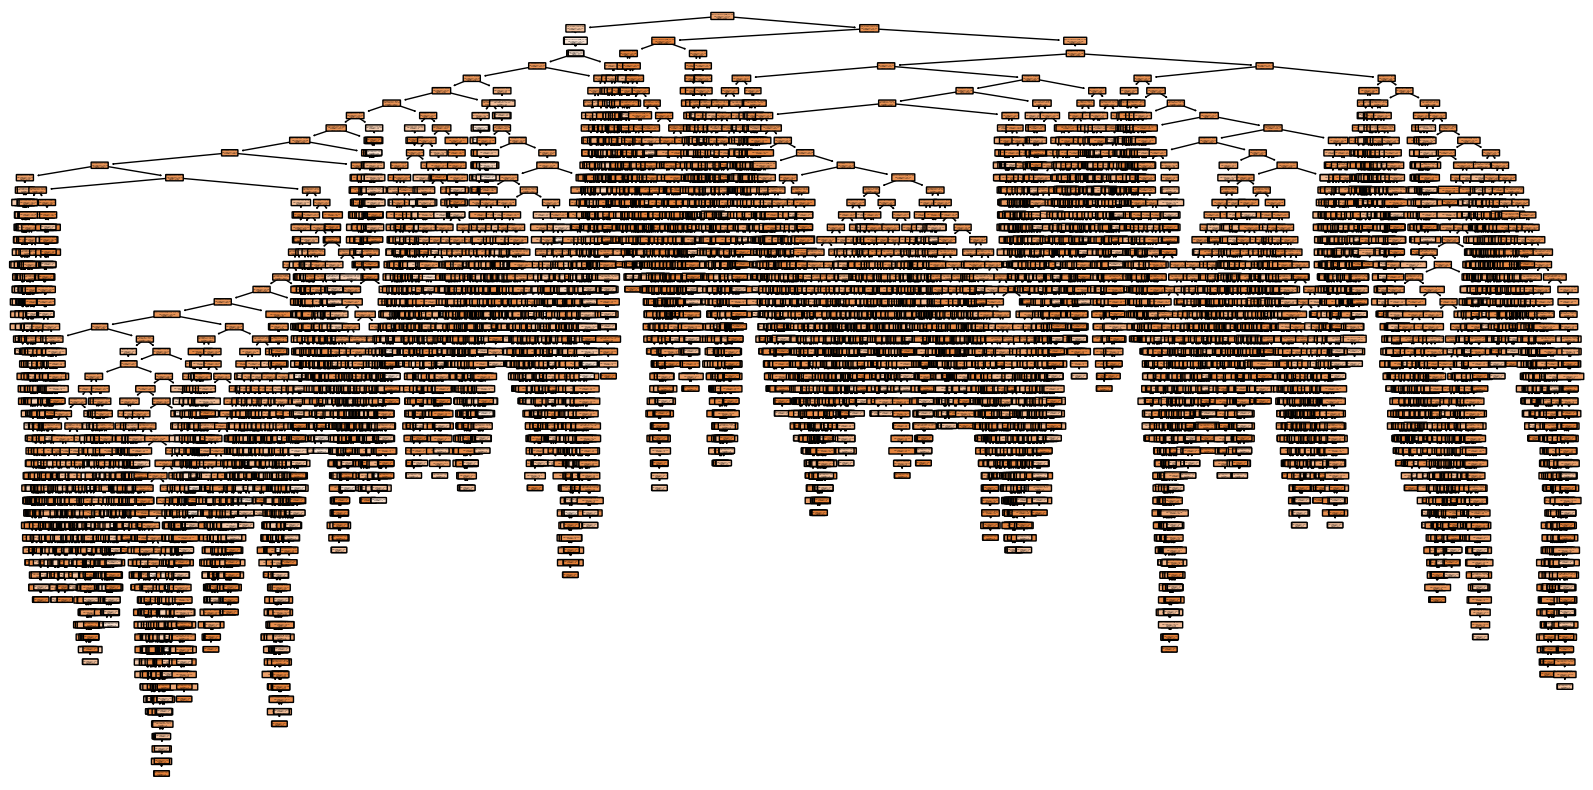

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=features.columns, filled=True, rounded=True)
plt.gca().invert_yaxis()
plt.show()

In [17]:
from sklearn.metrics import confusion_matrix , classification_report
cm= confusion_matrix(y_test, y_pred) 
print(cm)
print(classification_report(y_test, y_pred))

[[ 1988     0     0     0]
 [    0  5493    34    81]
 [    0    45  5277  1656]
 [    0    90  1827 19611]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1988
           1       0.98      0.98      0.98      5608
           2       0.74      0.76      0.75      6978
           4       0.92      0.91      0.91     21528

    accuracy                           0.90     36102
   macro avg       0.91      0.91      0.91     36102
weighted avg       0.90      0.90      0.90     36102



In [19]:
from sklearn.metrics import accuracy_score
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the test data
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracy on the training and test data
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 1.0000
Test Accuracy: 0.8966


In [21]:
import joblib
joblib.dump(model, 'deccisiontree.pkl')

['deccisiontree.pkl']

In [24]:
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score
cm= confusion_matrix(y_test, y_pred) 
print(cm)
print(classification_report(y_test, y_pred))

y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

[[ 1988     0     0     0]
 [    0  5493    34    81]
 [    0    45  5277  1656]
 [    0    90  1827 19611]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1988
           1       0.98      0.98      0.98      5608
           2       0.74      0.76      0.75      6978
           4       0.92      0.91      0.91     21528

    accuracy                           0.90     36102
   macro avg       0.91      0.91      0.91     36102
weighted avg       0.90      0.90      0.90     36102

Training Accuracy: 1.0000
Test Accuracy: 0.8966


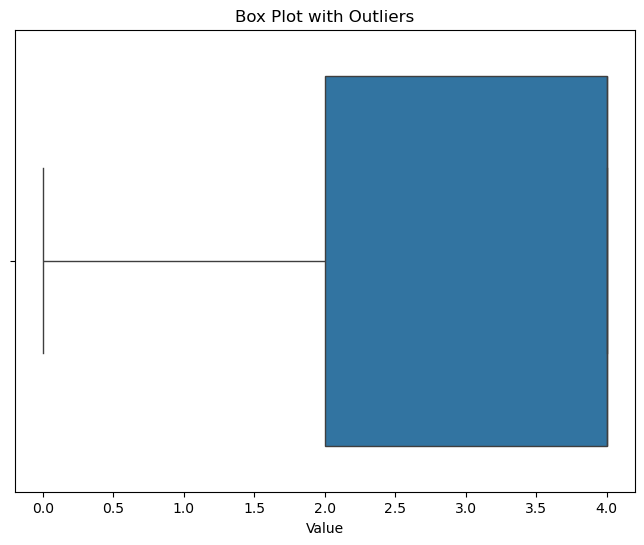

In [26]:
 import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Days for shipment (scheduled)'])

plt.title('Box Plot with Outliers')
plt.xlabel('Value')

plt.show()

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np

In [30]:
x1 = features
y1 = data['Days for shipment (scheduled)']


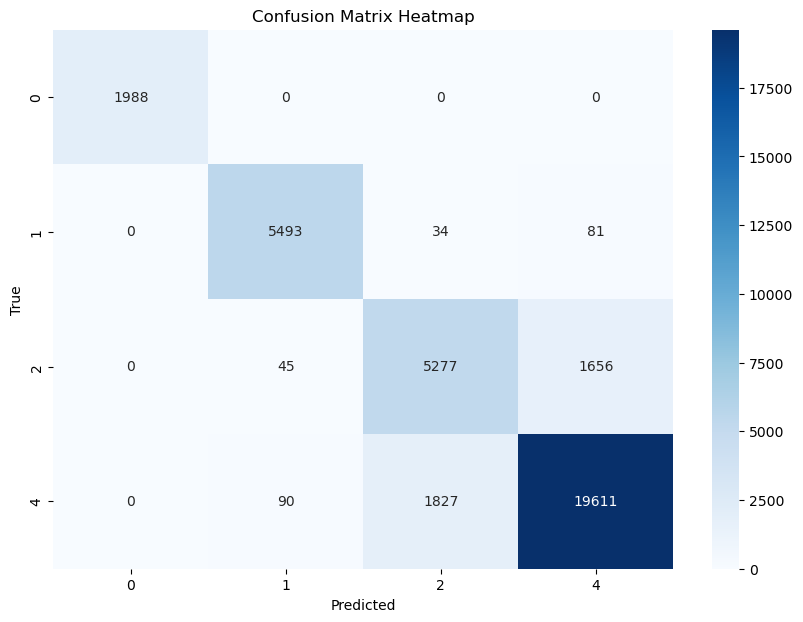

In [32]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y1), yticklabels=np.unique(y1))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [34]:

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier

In [36]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)



DecisionTreeClassifier()

In [38]:
y_score = clf.predict_proba(X_test)
classes = y1.unique()
y_test_bin = label_binarize(y_test, classes=classes)

fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

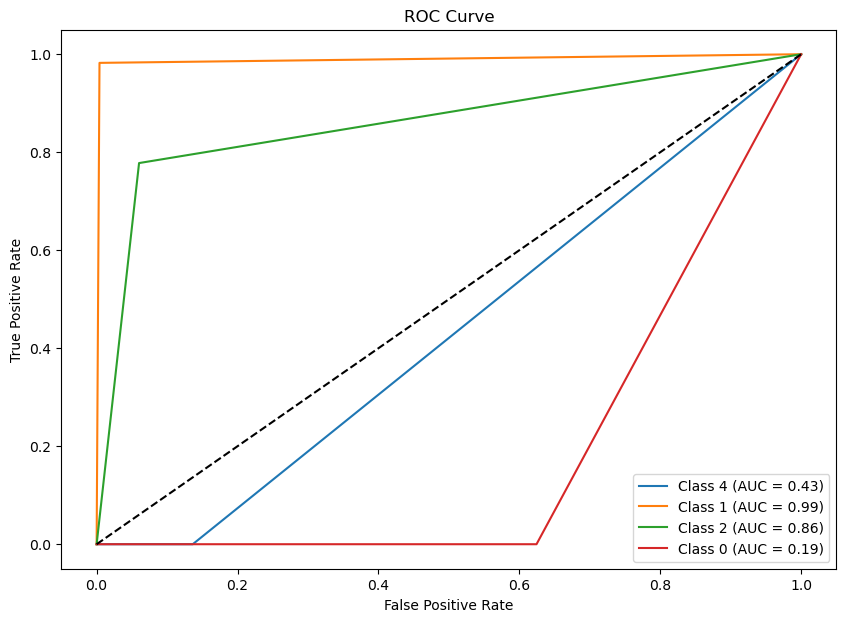

In [40]:
plt.figure(figsize=(10, 7))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

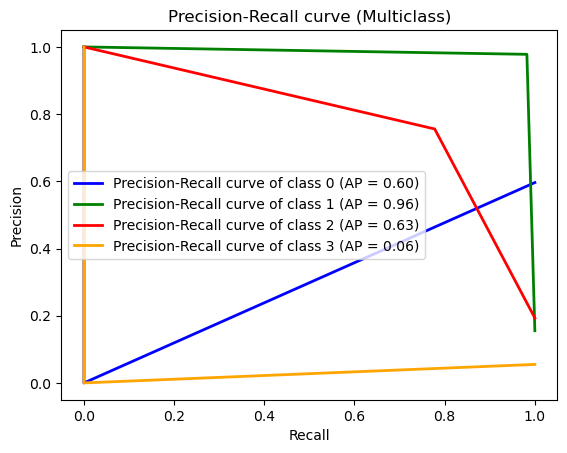

In [43]:
from sklearn.metrics import precision_recall_curve, average_precision_score
colors = ['blue', 'green', 'red', 'orange'] 
precision = {}
recall = {}
average_precision = {}
for i in range(len(classes)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

plt.figure()
for i, color in zip(range(len(classes)), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2, label=f'Precision-Recall curve of class {i} (AP = {average_precision[i]:0.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve (Multiclass)')
plt.legend(loc='best')
plt.show()